# Face-mask detection using `YOLOv3`
*A Deep Learning Based Assistive System to Classify COVID-19 Face Mask for Human Safety with YOLOv3*

# Download required files 
I'm already trained all things now use this for testing & visalization
* Custom configuration file `yolov3_custom.cfg`
* Custom final weights file `yolov3_custom_final.weights`
* Custom names file `obj.names`

In [ ]:
from IPython.display import clear_output
!gdown --id 1-7BWNSvVPzuzP6tDOhdCzecLwIBYJ_H9
!gdown --id 1-7K5KVUBWBYWO7FVp1Ix8m-zlDRyaA8R
!gdown --id 1-3-1tbM6UmCrgL0-QPEJlVUDzt7GaiGc
clear_output()

# Download image files for detection



In [ ]:
!gdown --id 1JN5xj7JhIFaGPce6PixeHLYq8AM4R4L5
!gdown --id 16urqtzOY3DEXsGccdtAr70RqWz_7mGSK
clear_output()

# Initialize `YOLOv3` 

In [ ]:
import cv2
import numpy as np

def objectDetector(img):
    yolo = cv2.dnn.readNet("/content/yolov3_custom_final.weights", "/content/yolov3_custom.cfg")
    classes = []

    with open("/content/obj.names", "r") as file:
        classes = [line.strip() for line in file.readlines()]
    layer_names = yolo.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

    colorRed = (209, 98, 98)
    colorGreen = (145, 134, 134)
    colorWhite = (237, 228, 228)

    height, width, channels = img.shape

    # # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), colorGreen, 3)
            cv2.putText(img, label, (x, y - 30), cv2.FONT_HERSHEY_PLAIN, 3, colorWhite, 2)
    return img

# Detection using image files

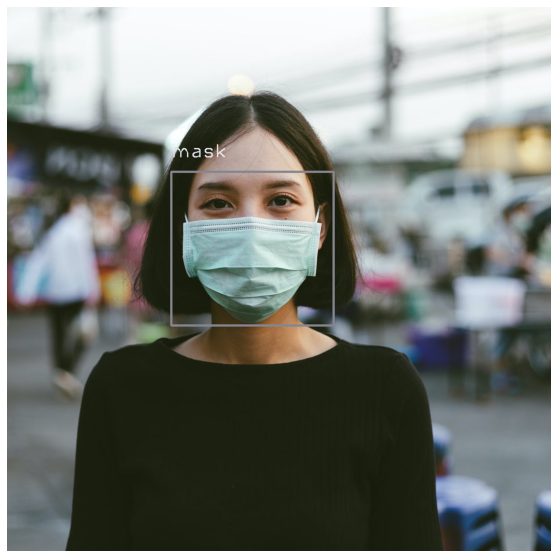

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("/content/girl.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

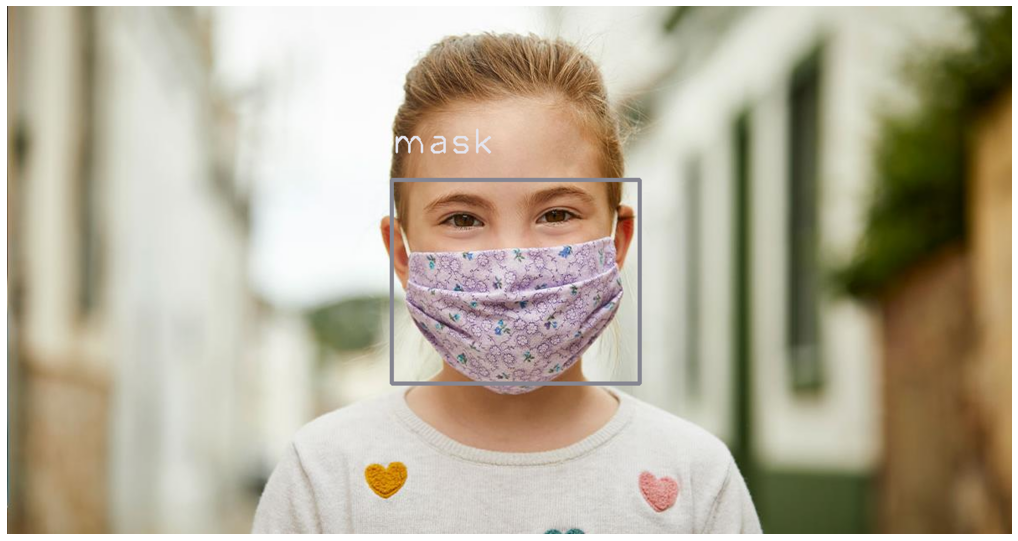

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

input_image = cv2.imread("/content/girl2.jpg")
image = objectDetector(input_image)
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

## Cite this as 
*M. R. Bhuiyan, S. A. Khushbu and M. S. Islam, "A Deep Learning Based Assistive System to Classify COVID-19 Face Mask for Human Safety with YOLOv3," 2020 11th International Conference on Computing, Communication and Networking Technologies (ICCCNT), Kharagpur, India, 2020, pp. 1-5, doi: 10.1109/ICCCNT49239.2020.9225384.*